In [1]:
!git clone https://github.com/jmsaavedrar/machine_learning
import sys
sys.path.append('/content/machine_learning')
import numpy as np
import nn.perceptron as perceptron
import sklearn.datasets as datasets
import metrics.metrics as metrics
import matplotlib.pyplot as plt
#dataset
iris = datasets.load_iris()

x = np.array(iris.data)
y = np.array(iris.target)
#classes
c1 = 0
c2 = 1
#features
f1 = 0
f2 = 1

idxs = np.where( (y == c1) | (y == c2) )[0]
x = x[idxs,:]
y = y[idxs]
y[y==c1] = 0
y[y==c2] = 1
n = x.shape[0]
n_test = int(np.rint(0.2 * n))

# random sort
idx = np.random.permutation(n)
X = x[idx,:][:,[f1,f2]]
y = y[idx]

X_train = X[:-n_test]
y_train = y[:-n_test]
X_test = X[-n_test:]
y_test = y[-n_test:]

""" data normalization, improve convergence """
mu = np.mean(X_train, axis = 0)
dst = np.std(X_train, axis = 0)
X_train = (X_train - mu) / dst
X_test = (X_test - mu) / dst
"""-------------------------------------------"""
print(y_test.shape)
print(X_test.shape)

Cloning into 'machine_learning'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 443 (delta 66), reused 45 (delta 34), pack-reused 338 (from 1)
Receiving objects: 100% (443/443), 662.57 KiB | 2.87 MiB/s, done.
Resolving deltas: 100% (223/223), done.
(20,)
(20, 2)


In [64]:
#Logistic Regression
model = perceptron.Perceptron()
model.setLoss('bce')
model.setSteps(50)
model.setPrintSteps(1)


coeff = model.fit(X_train, y_train)
#Evaluation (accuracy x clase)
y_pred =model.predict(X_test)
acc= metrics.accuracy(np.expand_dims(y_test, axis = 1) , y_pred)
for i in  range(len(y_pred)) :
    print('{} {}'.format(y_pred[i], y_test[i]))
print('Acc Test {}'.format(acc))

it 0 bce loss_bce 0.7404320590416356 loss_mse 0.2734890512966456
it 0 acc 0.2875
it 1 bce loss_bce 0.7134144692796195 loss_mse 0.26008200111902957
it 1 acc 0.4
it 2 bce loss_bce 0.6879803078263527 loss_mse 0.24743070761156788
it 2 acc 0.5875
it 3 bce loss_bce 0.6640398611685822 loss_mse 0.23552012688889484
it 3 acc 0.675
it 4 bce loss_bce 0.6415046502135836 loss_mse 0.2243284393226855
it 4 acc 0.75
it 5 bce loss_bce 0.6202883324550343 loss_mse 0.21382857562945196
it 5 acc 0.85
it 6 bce loss_bce 0.600307419108989 loss_mse 0.20398964115030677
it 6 acc 0.9
it 7 bce loss_bce 0.5814818171330141 loss_mse 0.19477818942599254
it 7 acc 0.925
it 8 bce loss_bce 0.563735212334369 loss_mse 0.1861593185131922
it 8 acc 0.925
it 9 bce loss_bce 0.5469953134609804 loss_mse 0.178097581800652
it 9 acc 0.9625
it 10 bce loss_bce 0.5311939786794231 loss_mse 0.17055771869430894
it 10 acc 0.9625
it 11 bce loss_bce 0.5162672456907347 loss_mse 0.1635052196066468
it 11 acc 0.9625
it 12 bce loss_bce 0.502155285426

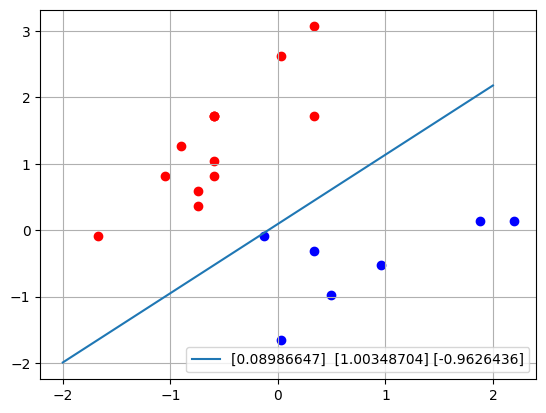

In [65]:
#--- view
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color = 'red')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color = 'blue')
x1 = np.linspace(-2, 2, 400)
x2 = - (coeff[0] + coeff[1]*x1) /coeff[2]
plt.plot(x1, x2, label = f'{coeff[0]}  {coeff[1]} {coeff[2]}')
plt.grid(True)
plt.legend()
plt.show()